# Sample analysis
This notebook shows how to perform a basic bioRSP analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipynb.fs.full.biorsp import (
    find_foreground_background_points,
    calculate_differences,
    convert_to_polar,
    rsp,
)

In [2]:
dge_matrix = pd.read_csv("data/MCA2_filtered.dge.txt", sep="\t", index_col=0)
tsne_results = pd.read_csv("embeddings/tsne_results.csv").to_numpy()
dbscan_results = pd.read_csv("embeddings/tsne_dbscan_results.csv")

In [3]:
gene_name = "Tnnt2" # Change this to your gene of interest
threshold = 10 # Define the threshold for foreground points - default is 1
clusters = [1] # Define the clusters to be considered as foreground - default is None (look at all clusters)

In [4]:
foreground_points, background_points = find_foreground_background_points(
    gene_name=gene_name,
    dge_matrix=dge_matrix,
    tsne_results=tsne_results,
    threshold=threshold,
    dbscan_df=dbscan_results,
    selected_clusters=clusters,
)

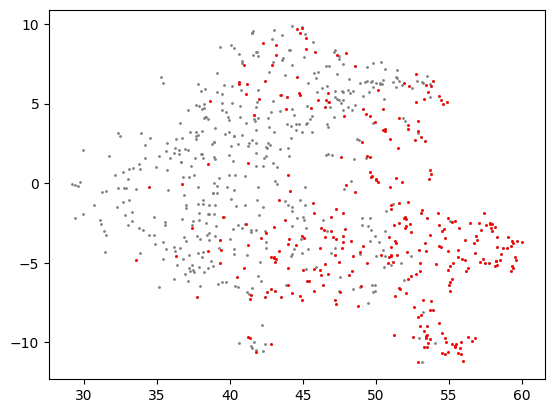

In [5]:
# Plot background and foreground points
gene_projection = plt.figure()
plt.scatter(background_points[:, 0], background_points[:, 1], color="grey", s=1)
plt.scatter(foreground_points[:, 0], foreground_points[:, 1], color="red", s=1)
# plt.title(f"t-SNE Projection of {gene_name} (threshold: {threshold})")
plt.show()

In [6]:
vantage_point = background_points.mean(axis=0)

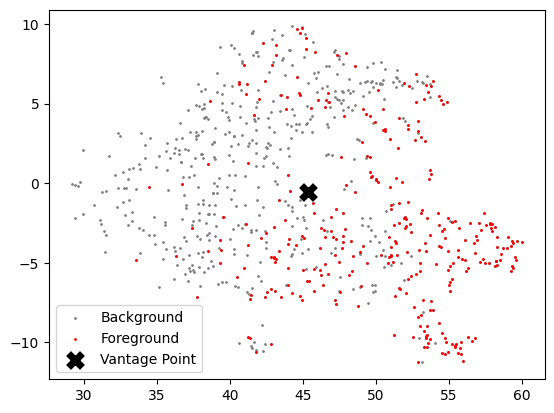

In [7]:
vantage_point_figure = plt.figure()
plt.scatter(background_points[:, 0], background_points[:, 1], color="grey", s=1)
plt.scatter(foreground_points[:, 0], foreground_points[:, 1], color="red", s=1)
plt.scatter(vantage_point[0], vantage_point[1], color="black", s=100, marker="x", linewidth=5)
plt.legend(["Background", "Foreground", "Vantage Point"])
plt.show()

In [8]:
fg_r, fg_theta = convert_to_polar(foreground_points, vantage_point)
bg_r, bg_theta = convert_to_polar(background_points, vantage_point)

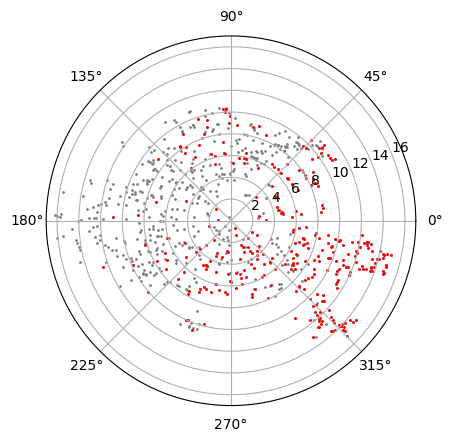

In [9]:
polar_projection = plt.figure()
plt.subplot(polar=True)
plt.scatter(bg_theta, bg_r, color="grey", s=1)
plt.scatter(fg_theta, fg_r, color="red", s=1)
# plt.title(f"Polar Projection of {gene_name} (threshold: {threshold})")
plt.show()

In [10]:
rsp_area, rmsd, deviation_score = rsp(
    foreground_points,
    background_points,
    vantage_point,
    scanning_window=np.pi / 2,
    resolution=1000,
    angle_range=np.array([0, 2 * np.pi]),
    mode="absolute",
)
print(f"RSP Area: {rsp_area}")
print(f"RMSD: {rmsd}")
print(f"Deviation Score: {deviation_score}")

RSP Area: 0.3330773962579111
RMSD: 0.3256099324241339
Deviation Score: 0.3712210150758103


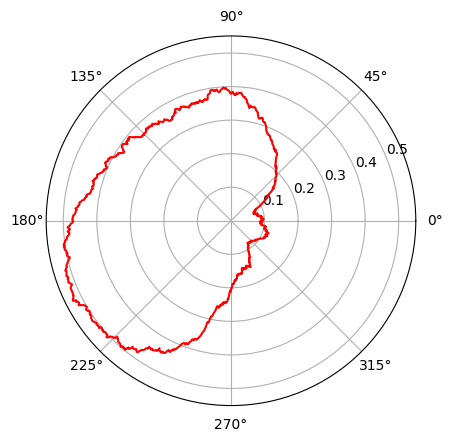

In [11]:
rsp_figure = plt.figure()
plt.subplot(polar=True)

differences = calculate_differences(
    fg_points=foreground_points,
    bg_points=background_points,
    scanning_window=np.pi / 2,
    resolution=1000,
    vantage_point=vantage_point,
    angle_range=np.array([0, 2 * np.pi]),
    mode="absolute",
)

plt.plot(np.linspace(0, 2 * np.pi, 1000), differences, color="red")
plt.show()

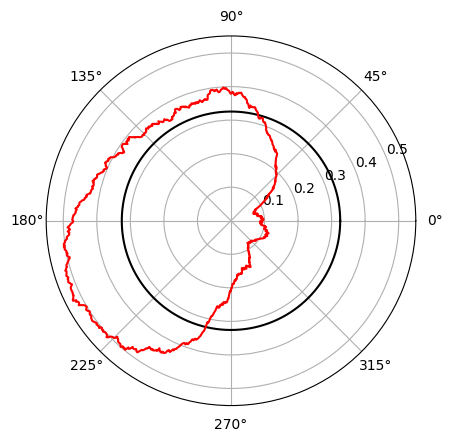

In [12]:
# get me the uniform radius
radius = np.sqrt(rsp_area / np.pi)

compare_figure = plt.figure()
plt.subplot(polar=True)

plt.plot(np.linspace(0, 2 * np.pi, 1000), np.ones(1000) * radius, color="black")
plt.plot(np.linspace(0, 2 * np.pi, 1000), differences, color="red")

# overlap = np.minimum(radius, differences)
# plt.fill(np.linspace(0, 2 * np.pi, 1000), overlap, color="gray", alpha=0.5)

plt.show()